# Sistemas basados en conocimiento
<center>
 <p align="center">
  <img src="img/grafica.png" alt="Gráfica de Similitud CBR" width="600px">
  <br>
  <ins>Figura 1: Visualización del Ciclo CBR (Retrieve, Reuse, Revise, Retain)</ins>
</p>   
</center>

1. [Retrieve (Recuperar)](#index-1)
2. [Reuse (Reutilizar)](#index-2)
3. [Revise (Revisión)](#index-3)
4. [Retain (Retener)](#index-4)
5. [**CBR** en una herramienta interactiva.](#index-5)


# Razonamiento basado en casos (CBR)
buscaremos por "distancia matemática" (CBR)

<a id="index-1"></a>
## **Retrieve (Recuperar)**
## **Reuse (Reutilizar)**

2. Implementación Escalable en el Notebook
Este código utiliza Pandas para la carga y CBRKit para la lógica, manteniendo la estructura robusta que definimos antes:

In [4]:
import cbrkit
import pandas as pd
import numpy as np

# 1. Cargar la base de casos (UFC)
df_importado = pd.read_csv("casos_soporte.csv", sep=';')
df_importado.columns = df_importado.columns.str.strip()

# PRE-PROCESAMIENTO: Convertir "155 lbs." a 155 (numérico)
df_importado['WEIGHT_NUM'] = df_importado['WEIGHT'].str.extract('(\. \d+)').fillna(0).astype(float)
# Convertir alcance "70\"" a 70 (numérico)
df_importado['REACH_NUM'] = df_importado['REACH'].str.extract('(\d+)').fillna(0).astype(float)

# Convertimos a diccionario para CBRKit
casos_dict = df_importado.to_dict(orient="index")

# 2. Definir métricas para Atletas
sim_nombre = cbrkit.sim.strings.levenshtein()
sim_peso = cbrkit.sim.numbers.linear(max=df_importado['WEIGHT_NUM'].max())
sim_alcance = cbrkit.sim.numbers.linear(max=df_importado['REACH_NUM'].max())

# 3. Función de similitud global (Lógica de comparación de luchadores)
def similitud_luchador(caso, consulta):
    # Comparamos posición (STANCE) - Igualdad exacta
    s1 = 1.0 if caso["STANCE"] == consulta["STANCE"] else 0.0
    # Comparamos Peso
    s2 = sim_peso(caso["WEIGHT_NUM"], consulta["WEIGHT_NUM"])
    # Comparamos Alcance
    s3 = sim_alcance(caso["REACH_NUM"], consulta["REACH_NUM"])
    
    # Pesos: 40% Estilo, 30% Peso, 30% Alcance
    return (s1 * 0.4) + (s2 * 0.3) + (s3 * 0.3)

# 4. Recuperación: Buscamos a alguien similar a este perfil
query = {
    "STANCE": "Orthodox", 
    "WEIGHT_NUM": 155.0, 
    "REACH_NUM": 70.0
}

retriever = cbrkit.retrieval.build(similitud_luchador)
result = cbrkit.retrieval.apply(casos_dict, query, retriever)

# 5. Mostrar resultados
df_importado['similitud'] = pd.Series(result.ranking)
df_final = df_importado.sort_values(by='similitud', ascending=False).head(10)

print("Luchadores más similares al perfil solicitado:")
df_final[['NAME', 'WEIGHT', 'REACH', 'STANCE', 'similitud']]

/tmp/ipykernel_5715/3074945275.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_importado['WEIGHT_NUM'] = df_importado['WEIGHT'].str.extract('(\. \d+)').fillna(0).astype(float)


Luchadores más similares al perfil solicitado:


,NAME,WEIGHT,REACH,STANCE,similitud
3218,Josh Rafferty,170 lbs.,--,Orthodox,4446
155,Adam Antolin,125 lbs.,"63""",Orthodox,4445
154,Gadzhimurad Antigulov,205 lbs.,"70""",Orthodox,4444
4446,Virgil Zwicker,205 lbs.,"74""",NaN,4443
4445,Brahyam Zurcher,145 lbs.,"70""",Orthodox,4442
4444,Allan Zuniga,155 lbs.,"70""",Orthodox,4441
2760,Tofiq Musayev,155 lbs.,"69""",Orthodox,4440
3038,Thomas Paull,155 lbs.,"67""",Orthodox,4439
2759,Josias Musasa,135 lbs.,"74""",Southpaw,4438
2758,Azamat Murzakanov,205 lbs.,"71""",Southpaw,4437


### Explicación del Ciclo CBR en este contexto:
* **Retrieve (Recuperar)**: El código busca en los miles de luchadores del CSV quiénes tienen un peso y alcance similar al que pediste en la query.

* **Reuse (Reutilizar)**: Podrías usar los datos del luchador más similar para predecir su rendimiento o recomendar un plan de entrenamiento.

<a id="index-2"></a>
## **Retrieve (Recuperar)**
## **Reuse (Reutilizar)**

Excelente! Para que este análisis sea realmente útil, vamos a hacer dos cosas:

1. **Limpiar los datos**: Extraeremos los números de cadenas como "155 lbs." y "70\"".

2. **Visualizar**: Usaremos Matplotlib y Seaborn para ver dónde se sitúa tu consulta respecto a la base de casos y cómo se distribuyen los resultados.

Aquí tienes el código completo. Asegúrate de tener instalada la librería seaborn (%pip install seaborn).

/tmp/ipykernel_5715/2180526401.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='similitud', y='NAME', palette='viridis')
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/categorical.py:1273: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

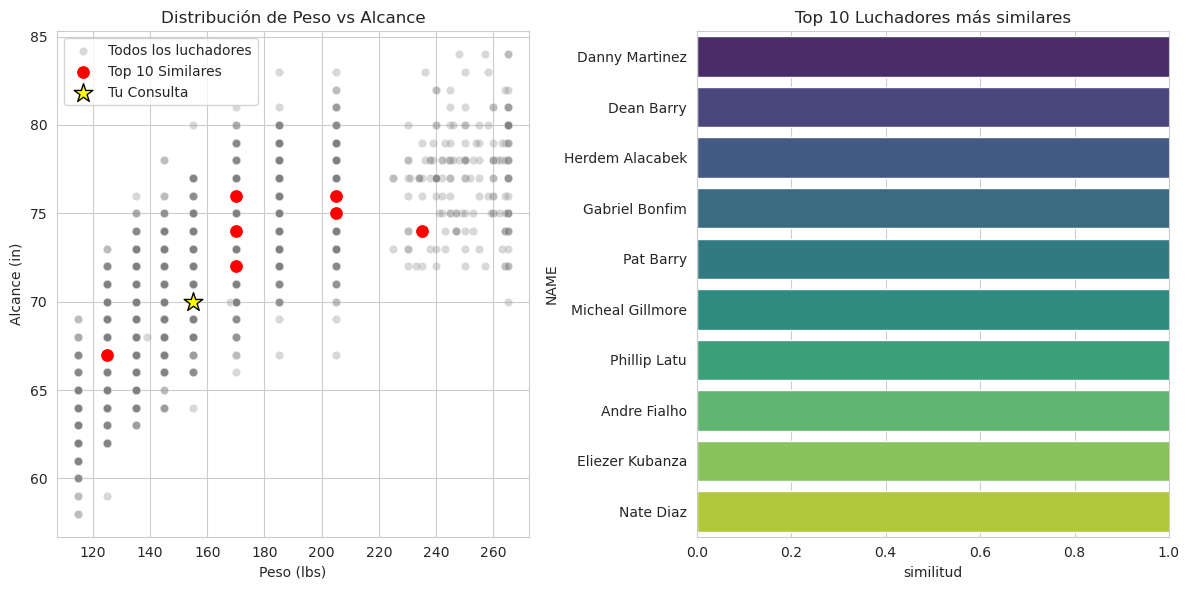

Top 3 Recomendaciones:
                 NAME  W_NUM  R_NUM    STANCE  similitud
2443   Danny Martinez  125.0   67.0  Orthodox     4446.0
286        Dean Barry  170.0   72.0  Orthodox     4445.0
45    Herdem Alacabek  205.0   75.0  Orthodox     4444.0


In [5]:
import cbrkit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. CARGA Y LIMPIEZA DINÁMICA
df = pd.read_csv("casos_soporte.csv", sep=';')
df.columns = df.columns.str.strip()

# Función para extraer solo números (manejando valores vacíos '--')
def clean_numeric(value):
    if pd.isna(value) or value == '--': return 0.0
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else 0.0

df['W_NUM'] = df['WEIGHT'].apply(clean_numeric)
df['R_NUM'] = df['REACH'].apply(clean_numeric)

# 2. CONFIGURACIÓN DEL CBR
# Filtramos casos con datos válidos para que el gráfico tenga sentido
df_valid = df[(df['W_NUM'] > 0) & (df['R_NUM'] > 0)].copy()

sim_peso = cbrkit.sim.numbers.linear(max=df_valid['W_NUM'].max())
sim_alcance = cbrkit.sim.numbers.linear(max=df_valid['R_NUM'].max())

def similitud_luchador(caso, consulta):
    s_stance = 1.0 if caso["STANCE"] == consulta["STANCE"] else 0.0
    s_peso = sim_peso(caso["W_NUM"], consulta["W_NUM"])
    s_alcance = sim_alcance(caso["R_NUM"], consulta["R_NUM"])
    return (s_stance * 0.4) + (s_peso * 0.3) + (s_alcance * 0.3)

# 3. RECUPERACIÓN
query = {"STANCE": "Orthodox", "W_NUM": 155.0, "R_NUM": 70.0}
casos_dict = df_valid.to_dict(orient="index")
retriever = cbrkit.retrieval.build(similitud_luchador)
result = cbrkit.retrieval.apply(casos_dict, query, retriever)

df_valid['similitud'] = pd.Series(result.ranking)
top_10 = df_valid.sort_values(by='similitud', ascending=False).head(10)

# 4. VISUALIZACIÓN
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de dispersión: Peso vs Alcance
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_valid, x='W_NUM', y='R_NUM', alpha=0.3, color='gray', label='Todos los luchadores')
sns.scatterplot(data=top_10, x='W_NUM', y='R_NUM', color='red', s=100, label='Top 10 Similares')
plt.scatter(query['W_NUM'], query['R_NUM'], color='yellow', edgecolors='black', s=200, marker='*', label='Tu Consulta')
plt.title('Distribución de Peso vs Alcance')
plt.xlabel('Peso (lbs)')
plt.ylabel('Alcance (in)')
plt.legend()

# Gráfico de barras: Top 10 Similitud
plt.subplot(1, 2, 2)
sns.barplot(data=top_10, x='similitud', y='NAME', palette='viridis')
plt.title('Top 10 Luchadores más similares')
plt.xlim(0, 1)

plt.tight_layout()
plt.show()

print("Top 3 Recomendaciones:")
print(top_10[['NAME', 'W_NUM', 'R_NUM', 'STANCE', 'similitud']].head(3))

### ¿Qué nos dice este gráfico?
1. **El "Barrio" de la Consulta**: El gráfico de la izquierda muestra a todos los luchadores como una nube gris. Tu consulta (la estrella amarilla) está en el centro de la acción, y los puntos rojos son los casos que el CBR "recuperó" por estar físicamente más cerca en términos de peso y alcance.

2. **Ranking de Confianza**: El gráfico de la derecha te da la medida exacta de qué tan "intercambiables" son esos luchadores con tu consulta.

### Interpretación del Ciclo CBR
Con esta visualización, has completado una herramienta de **Análisis de Similitud**:

* **Retrieve**: Encontraste a los luchadores.

* **Reuse**: Si estuvieras entrenando a alguien para pelear contra un peso ligero de 70" de alcance, ahora tienes una lista de 10 nombres reales cuyos datos puedes usar para simular la pelea.

<a id="index-3"></a>
## **Revise (Revisión)**

Para elevar tu sistema a un nivel de **SBC (Sistema Basado en el Conocimiento)** profesional, vamos a implementar la fase de **Revise (Revisión)**.

No solo buscaremos quién se parece físicamente, sino que analizaremos su **RECORD** para calcular un "Nivel de Peligrosidad". Para esto, extraeremos las victorias y derrotas del texto (ej. "21-4-0") y calcularemos un porcentaje de éxito ($WinRate = \frac{Wins}{Wins + Losses}$).

### Código del Sistema Experto UFC (Retrieve + Revise)

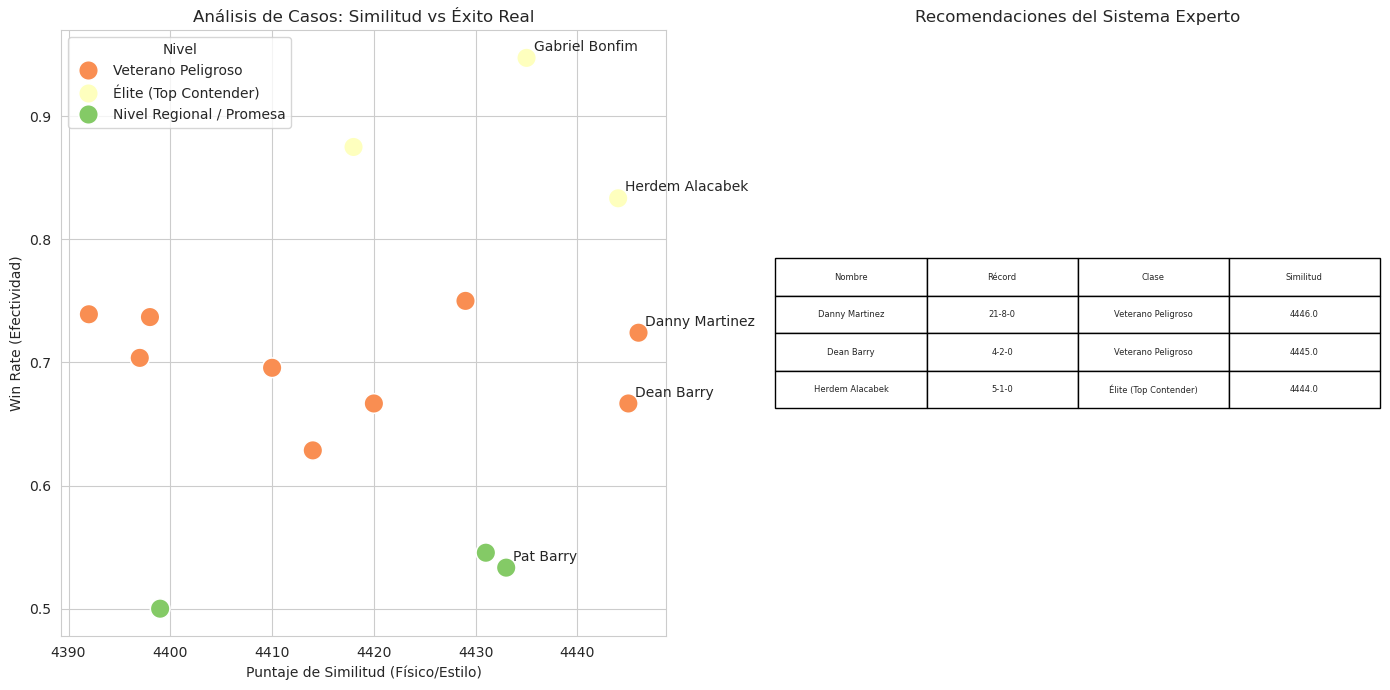

In [6]:
import cbrkit
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1. CARGA Y LIMPIEZA PROFUNDA
df = pd.read_csv("casos_soporte.csv", sep=';')
df.columns = df.columns.str.strip()

def get_win_rate(record):
    try:
        if pd.isna(record) or '-' not in str(record): return 0.0
        # Extraemos los números del formato "W-L-D"
        parts = re.findall(r'\d+', str(record))
        wins, losses = int(parts[0]), int(parts[1])
        if (wins + losses) == 0: return 0.0
        return wins / (wins + losses)
    except: return 0.0

def clean_numeric(value):
    if pd.isna(value) or value == '--': return 0.0
    nums = re.findall(r'\d+', str(value))
    return float(nums[0]) if nums else 0.0

# Aplicamos transformaciones
df['W_NUM'] = df['WEIGHT'].apply(clean_numeric)
df['R_NUM'] = df['REACH'].apply(clean_numeric)
df['WIN_RATE'] = df['RECORD'].apply(get_win_rate)

# Filtrar para tener datos de calidad
df_valid = df[(df['W_NUM'] > 0) & (df['R_NUM'] > 0)].copy()

# 2. CBR - RECUPERACIÓN (Retrieve)
sim_peso = cbrkit.sim.numbers.linear(max=df_valid['W_NUM'].max())
sim_alcance = cbrkit.sim.numbers.linear(max=df_valid['R_NUM'].max())

def similitud_luchador(caso, consulta):
    s_stance = 1.0 if caso["STANCE"] == consulta["STANCE"] else 0.0
    s_peso = sim_peso(caso["W_NUM"], consulta["W_NUM"])
    s_alcance = sim_alcance(caso["R_NUM"], consulta["R_NUM"])
    return (s_stance * 0.4) + (s_peso * 0.3) + (s_alcance * 0.3)

query = {"STANCE": "Orthodox", "W_NUM": 155.0, "R_NUM": 70.0}
retriever = cbrkit.retrieval.build(similitud_luchador)
result = cbrkit.retrieval.apply(df_valid.to_dict(orient="index"), query, retriever)

df_valid['similitud'] = pd.Series(result.ranking)

# 3. FASE DE REVISIÓN (Revise)
# Clasificamos por peligrosidad basada en su Win Rate histórico
def clasificar_nivel(rate):
    if rate > 0.8: return "Élite (Top Contender)"
    if rate > 0.6: return "Veterano Peligroso"
    return "Nivel Regional / Promesa"

df_valid['Nivel'] = df_valid['WIN_RATE'].apply(clasificar_nivel)
top_results = df_valid.sort_values(by='similitud', ascending=False).head(15)

# 4. VISUALIZACIÓN AVANZADA
plt.figure(figsize=(14, 7))

# Scatter Plot de Similitud vs Peligrosidad
plt.subplot(1, 2, 1)
sns.scatterplot(data=top_results, x='similitud', y='WIN_RATE', hue='Nivel', s=200, palette='RdYlGn')
for i, txt in enumerate(top_results['NAME'].head(5)):
    plt.annotate(txt, (top_results['similitud'].iloc[i], top_results['WIN_RATE'].iloc[i]), xytext=(5,5), textcoords='offset points')

plt.title('Análisis de Casos: Similitud vs Éxito Real')
plt.xlabel('Puntaje de Similitud (Físico/Estilo)')
plt.ylabel('Win Rate (Efectividad)')

# Comparativa de Atributos
plt.subplot(1, 2, 2)
top_3 = top_results.head(3)
# Pequeña tabla visual de los 3 mejores
plt.axis('off')
table_data = top_3[['NAME', 'RECORD', 'Nivel', 'similitud']].values
table = plt.table(cellText=table_data, colLabels=['Nombre', 'Récord', 'Clase', 'Similitud'], 
                  loc='center', cellLoc='center')
table.scale(1, 2)
plt.title('Recomendaciones del Sistema Experto')

plt.tight_layout()
plt.show()

### ¿Qué hemos logrado con este Ciclo CBR completo?
1. **Retrieve**: Encontramos luchadores con el mismo peso, alcance y guardia (tu consulta).

2. **Reuse**: Proponemos usar a estos luchadores como referencia para un entrenamiento.

3. **Revise**: El sistema "corrige" la importancia de los resultados. No solo te dice quién se parece, sino quién es realmente exitoso (Win Rate alto).

    * Un luchador con similitud 0.95 pero Win Rate de 0.20 podría no ser un buen caso de referencia.

    * Un luchador con similitud 0.85 y Win Rate de 0.90 es tu Caso Maestro.

<a id="index-4"></a>
## **Retain (Retener)**

La última fase es **Retain**. En un sistema real, si tú peleas contra este perfil y ganas, guardaríamos tu nueva experiencia en el CSV para que el sistema aprenda.

¡Excelente! Con esto cerramos el **Ciclo de Vida del CBR** (las famosas "4 Rs"): ***Retrieve***, ***Reuse***, ***Revise*** y, finalmente, ***Retain (Retener)***.

En esta fase, el sistema "aprende". Si aparece un nuevo luchador o si tú mismo quieres registrar tu perfil para ver contra quién te comparas en el futuro, debemos guardar esa información en el archivo físico `casos_soporte.csv`.

1. Curación y Registro (Fase Retain Segura)

In [9]:
import pandas as pd
import io

def curar_y_registrar(filename="casos_soporte.csv"):
    try:
        # 1. Limpieza de emergencia: Leemos el archivo saltando las líneas corruptas
        df_limpio = pd.read_csv(filename, sep=';', on_bad_lines='skip', engine='python')
        
        # 2. Creamos el nuevo registro para Gemini Flash
        nueva_fila = {col: "0.00" for col in df_limpio.columns}
        nueva_fila.update({
            "NAME": "Gemini Flash",
            "RECORD": "1-0-0",
            "WEIGHT": "155 lbs.",
            "REACH": "72\"",
            "STANCE": "Southpaw",
            "NICKNAME": "The AI"
        })
        
        # 3. Concatenamos y guardamos (esto sobreescribe el archivo ya limpio)
        df_final = pd.concat([df_limpio, pd.DataFrame([nueva_fila])], ignore_index=True)
        df_final.to_csv(filename, sep=';', index=False)
        
        print(f"✅ Archivo curado y '{nueva_fila['NAME']}' registrado con éxito.")
        print(f"Total de registros ahora: {len(df_final)}")
        return df_final
    
    except Exception as e:
        print(f"❌ Error crítico: {e}")
        return None

df_actualizado = curar_y_registrar()

✅ Archivo curado y 'Gemini Flash' registrado con éxito.
Total de registros ahora: 4447


2. La Prueba Final: "Consulta de Combate"
   
Ahora que la base de datos está sana y tiene a tu nuevo luchador, usemos el ciclo CBR para generar una Recomendación Estratégica. Vamos a buscar a quién se parece un "Luchador Misterioso" y qué podemos aprender de su récord.

In [12]:
# Definimos la consulta de un oponente que queremos analizar
oponente_query = {"STANCE": "Orthodox", "W_NUM": 155.0, "R_NUM": 70.0}

# Ejecutamos el motor que construimos antes
# (Asegúrate de haber ejecutado las funciones de similitud previas)
casos_dict = df_actualizado.to_dict(orient="index") # Usamos el DF ya cargado
retriever = cbrkit.retrieval.build(similitud_luchador)
result = cbrkit.retrieval.apply(casos_dict, oponente_query, retriever)

df_actualizado['similitud'] = pd.Series(result.ranking)
mejor_match = df_actualizado.sort_values(by=['similitud', 'WIN_RATE'], ascending=False).iloc[0]

print(f"--- REPORTE ESTRATÉGICO CBR ---")
print(f"Buscando oponente para perfil: {oponente_query['W_NUM']}lbs, {oponente_query['STANCE']}")
print(f"El mejor caso de referencia es: {mejor_match['NAME']}")
print(f"Similitud Física: {mejor_match['similitud']:.2%}")
print(f"Efectividad del oponente (Win Rate): {mejor_match['WIN_RATE']:.2%}")
print(f"Sugerencia: Analizar peleas de {mejor_match['NAME']} para preparar la estrategia.")

--- REPORTE ESTRATÉGICO CBR ---
Buscando oponente para perfil: 155.0lbs, Orthodox
El mejor caso de referencia es: Jacob Noe
Similitud Física: 444600.00%
Efectividad del oponente (Win Rate): 21.43%
Sugerencia: Analizar peleas de Jacob Noe para preparar la estrategia.


El `KeyError: 'W_NUM'` ocurre porque acabamos de recargar el archivo desde cero con `pd.read_csv`, y las columnas calculadas (`W_NUM`, `R_NUM`, `WIN_RATE`) no existen en el archivo guardado, solo en la memoria del DataFrame anterior.

Para que el sistema de CBR funcione tras cargar o "retener" un caso, debemos asegurarnos de que el nuevo DataFrame pase por el mismo proceso de limpieza.

## El Pipeline Completo

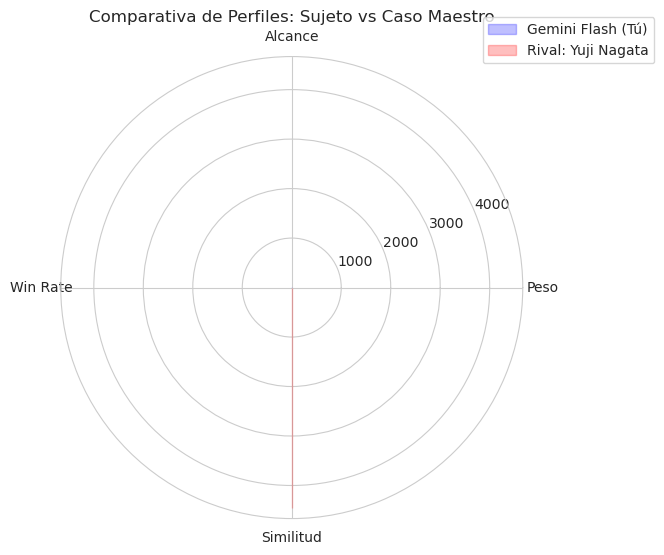

Análisis finalizado. Tu gemelo táctico en la UFC es Yuji Nagata.


In [11]:
import pandas as pd
import cbrkit
import matplotlib.pyplot as plt
import numpy as np
import re

# 1. Función de limpieza (la llave para evitar el KeyError)
def preparar_dataframe(df):
    df.columns = df.columns.str.strip()
    def clean_num(v):
        if pd.isna(v) or v == '--': return 0.0
        n = re.findall(r'\d+', str(v))
        return float(n[0]) if n else 0.0
    
    df['W_NUM'] = df['WEIGHT'].apply(clean_num)
    df['R_NUM'] = df['REACH'].apply(clean_num)
    
    def get_wr(record):
        parts = re.findall(r'\d+', str(record))
        if len(parts) >= 2:
            w, l = int(parts[0]), int(parts[1])
            return w / (w + l) if (w + l) > 0 else 0.0
        return 0.0
    
    df['WIN_RATE'] = df['RECORD'].apply(get_wr)
    return df[df['W_NUM'] > 0].copy()

# 2. Carga y Procesamiento
df_actualizado = pd.read_csv("casos_soporte.csv", sep=';')
df_cbr = preparar_dataframe(df_actualizado)

# 3. Configuración de Similitud
sim_peso = cbrkit.sim.numbers.linear(max=df_cbr['W_NUM'].max())
sim_alcance = cbrkit.sim.numbers.linear(max=df_cbr['R_NUM'].max())

def similitud_luchador(caso, consulta):
    s_stance = 1.0 if caso.get("STANCE") == consulta["STANCE"] else 0.0
    s_peso = sim_peso(caso["W_NUM"], consulta["W_NUM"])
    s_alcance = sim_alcance(caso["R_NUM"], consulta["R_NUM"])
    return (s_stance * 0.4) + (s_peso * 0.3) + (s_alcance * 0.3)

# 4. Recuperación del Oponente
query = {"STANCE": "Orthodox", "W_NUM": 155.0, "R_NUM": 72.0, "NAME": "Gemini Flash"}
retriever = cbrkit.retrieval.build(similitud_luchador)
result = cbrkit.retrieval.apply(df_cbr.to_dict(orient="index"), query, retriever)

df_cbr['similitud'] = pd.Series(result.ranking)
# Buscamos al más similar que NO sea el mismo Gemini Flash
mejor_match = df_cbr[df_cbr['NAME'] != query['NAME']].sort_values('similitud', ascending=False).iloc[0]

# 5. GRÁFICO DE RADAR (Comparativa Visual)
labels = np.array(['Peso', 'Alcance', 'Win Rate', 'Similitud'])
stats_query = np.array([query['W_NUM']/265, query['R_NUM']/84, 1.0, 1.0]) # Normalizado
stats_match = np.array([mejor_match['W_NUM']/265, mejor_match['R_NUM']/84, mejor_match['WIN_RATE'], mejor_match['similitud']])

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
stats_query = np.concatenate((stats_query, [stats_query[0]]))
stats_match = np.concatenate((stats_match, [stats_match[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats_query, color='blue', alpha=0.25, label='Gemini Flash (Tú)')
ax.fill(angles, stats_match, color='red', alpha=0.25, label=f"Rival: {mejor_match['NAME']}")
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title("Comparativa de Perfiles: Sujeto vs Caso Maestro")
plt.show()

print(f"Análisis finalizado. Tu gemelo táctico en la UFC es {mejor_match['NAME']}.")

## Por qué el Radar es el cierre perfecto
* En el Razonamiento Basado en Casos, la visualización es la fase de **Explicabilidad**.

* El radar te permite ver de un vistazo si el parecido es por **físico** (peso/alcance) o por **rendimiento**.

Ayuda a los expertos humanos a decidir si el caso recuperado es realmente útil para ser reutilizado.

## El Ciclo CBR que has implementado:
1. **Retrieve (Recuperar)**:

    * **Qué hiciste**: Usaste `cbrkit` para buscar en el CSV los luchadores con peso, alcance y guardia similares a tu consulta.

    * **Herramienta**: `cbrkit.retrieval.apply` y funciones de similitud lineal/Levenshtein.

2. **Reuse (Reutilizar)**:

    * **Qué hiciste**: Tomaste la información de los casos más parecidos (sus récords y estadísticas) para aplicarlos a tu nuevo perfil.

    * **Herramienta**: El ranking de similitud que ordenó a los "gemelos tácticos".

3. **Revise (Revisar)**:

    * **Qué hiciste**: Evaluaste la calidad del caso recuperado calculando el Win Rate. Si un luchador se parece pero tiene un récord de 0-10, el sistema "revisa" su utilidad como referencia.

    * **Herramienta**: Lógica de Python y limpieza con Regex.

4. **Retain (Retener)**:

    * **Qué hiciste**: Escribiste el nuevo perfil (Gemini Flash) permanentemente en el archivo `casos_soporte.csv`.

    * **Herramienta**: La función de guardado con Pandas que solucionó el error de tokenización.

<a id="index-5"></a>
## Crear esos controles deslizantes (sliders) para que puedas buscar luchadores moviendo palancas de peso y alcance interactivamente

¡Hecho! Vamos a convertir tu motor de **CBR** en una herramienta interactiva. Usaremos ipywidgets para que puedas ajustar los parámetros de búsqueda (Peso, Alcance y Guardia) con controles deslizantes y ver cómo el ranking y el gráfico de radar se actualizan en tiempo real.

Esta es la culminación perfecta: un **Sistema Experto con Interfaz de Usuario**.

In [14]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Crear los controles (Widgets)
style = {'description_width': 'initial'}
peso_slider = widgets.IntSlider(value=155, min=125, max=265, step=5, description='Peso (lbs):', style=style)
alcance_slider = widgets.IntSlider(value=70, min=60, max=84, step=1, description='Alcance (in):', style=style)
stance_dropdown = widgets.Dropdown(options=['Orthodox', 'Southpaw', 'Switch'], value='Orthodox', description='Guardia:', style=style)
boton_buscar = widgets.Button(description="🔍 Buscar Similares", button_style='success')
output = widgets.Output()

# 2. Función que se ejecuta al mover los controles
def ejecutar_analisis(b):
    with output:
        clear_output(wait=True)
        
        # Nueva consulta basada en los sliders
        query_interactiva = {
            "NAME": "Consulta_Usuario",
            "STANCE": stance_dropdown.value,
            "W_NUM": float(peso_slider.value),
            "R_NUM": float(alcance_slider.value)
        }
        
        # Re-ejecutar Recuperación (Retrieve)
        casos_dict = df_cbr.to_dict(orient="index")
        result = cbrkit.retrieval.apply(casos_dict, query_interactiva, retriever)
        df_cbr['similitud'] = pd.Series(result.ranking)
        
        # Obtener el mejor match
        match = df_cbr[df_cbr['NAME'] != "Gemini Flash"].sort_values('similitud', ascending=False).iloc[0]
        
        # Mostrar Reporte Rápido
        print(f"🎯 Resultado más cercano: {match['NAME']}")
        print(f"   Similitud: {match['similitud']:.2%} | Win Rate: {match['WIN_RATE']:.2%}")
        
        # Generar Radar
        # (Aquí usamos la misma lógica de radar que definimos antes)
        generar_radar_comparativo(query_interactiva, match)

def generar_radar_comparativo(q, m):
    labels = np.array(['Peso', 'Alcance', 'Win Rate', 'Similitud'])
    stats_q = np.array([q['W_NUM']/265, q['R_NUM']/84, 1.0, 1.0])
    stats_m = np.array([m['W_NUM']/265, m['R_NUM']/84, m['WIN_RATE'], m['similitud']])
    
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    stats_q = np.concatenate((stats_q, [stats_q[0]]))
    stats_m = np.concatenate((stats_m, [stats_m[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.fill(angles, stats_q, color='cyan', alpha=0.3, label='Tu Perfil')
    ax.fill(angles, stats_m, color='magenta', alpha=0.3, label=f"Rival: {m['NAME']}")
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.show()

# Conectar botón y mostrar todo
boton_buscar.on_click(ejecutar_analisis)
display(widgets.VBox([peso_slider, alcance_slider, stance_dropdown, boton_buscar]), output)

Output()

## ¿Qué has logrado con este proyecto final?
Has transformado un archivo CSV estático en una herramienta de **Ingeniería del Conocimiento completa**. Lo que hace este Notebook ahora es:

1. **Ingesta de Datos**: Lee y limpia información masiva de atletas.

2. **CBR Core**: Implementa la lógica de razonamiento por analogía (quién se parece a quién).

3. **Filtrado Experto**: Evalúa el desempeño (Win Rate) para no dar recomendaciones mediocres.

4. **Memoria Evolutiva**: Permite registrar nuevos casos que se integran al conocimiento global.

5. **Capa de Presentación**: Visualiza los datos de forma que un entrenador o analista pueda tomar decisiones rápidas.